In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1) Import the necessary packages

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from collections import Counter,namedtuple,defaultdict,OrderedDict
import warnings
warnings.filterwarnings('ignore')

## 2) Loading the AdmissionsCorePopulatedTable dataset 

In [ ]:
data_AdmissionsCorePopulatedTable=pd.read_csv("/content/drive/My Drive/Colab Notebooks/AdmissionsCorePopulatedTable.txt",sep='\t')
data_AdmissionsCorePopulatedTable.head()

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate
0,9380F9E3-1927-42F3-9731-03A74D4E4C6B,5,2011-03-23 00:14:52.237,2011-03-28 01:57:56.467
1,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1,1974-02-10 00:04:28.357,1974-02-16 21:04:43.333
2,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,2,1991-05-22 15:08:52.743,1991-05-29 12:30:08.737
3,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,3,1995-02-26 08:01:26.477,1995-02-28 16:45:04.407
4,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,4,2005-03-17 04:51:15.747,2005-04-04 04:04:14.160


In [ ]:
data_AdmissionsCorePopulatedTable=data_AdmissionsCorePopulatedTable.drop(columns=['AdmissionID','AdmissionStartDate','AdmissionEndDate'],axis=1)
data_AdmissionsCorePopulatedTable.head()

,PatientID
0,9380F9E3-1927-42F3-9731-03A74D4E4C6B
1,0A89658C-C739-45CA-9BF1-CBDDDFB922C0
2,0A89658C-C739-45CA-9BF1-CBDDDFB922C0
3,0A89658C-C739-45CA-9BF1-CBDDDFB922C0
4,0A89658C-C739-45CA-9BF1-CBDDDFB922C0


In [ ]:
data_AdmissionsCorePopulatedTable.shape

(361760, 1)

In [ ]:
data_AdmissionsCorePopulatedTable.size

361760

In [ ]:
data_AdmissionsCorePopulatedTable.isna().sum().to_frame()

,0
PatientID,0


## 3) Load the AdmissionsDiagnosisCorePopulatedTable dataset

In [ ]:
data_AdmissionsDiagnosesCorePopulatedTable=pd.read_csv("/content/drive/My Drive/Colab Notebooks/AdmissionsDiagnosesCorePopulatedTable.txt",sep='\t')
data_AdmissionsDiagnosesCorePopulatedTable.head()

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,54C6E968-45B3-46B1-A64F-2CE3124F2A65,3,F80.1,Expressive language disorder
1,54C6E968-45B3-46B1-A64F-2CE3124F2A65,4,R04.81,Acute idiopathic pulmonary hemorrhage in infants
2,54C6E968-45B3-46B1-A64F-2CE3124F2A65,5,I36,Nonrheumatic tricuspid valve disorders
3,9DD23357-9BEB-43E4-802D-1AB7ACDD4A3A,1,H16.43,Localized vascularization of cornea
4,9DD23357-9BEB-43E4-802D-1AB7ACDD4A3A,2,M05.161,Rheumatoid lung disease with rheumatoid arthri...


In [ ]:
data_AdmissionsDiagnosesCorePopulatedTable=data_AdmissionsDiagnosesCorePopulatedTable.drop(columns=['AdmissionID'],axis=1)
data_AdmissionsDiagnosesCorePopulatedTable.head()

,PatientID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,54C6E968-45B3-46B1-A64F-2CE3124F2A65,F80.1,Expressive language disorder
1,54C6E968-45B3-46B1-A64F-2CE3124F2A65,R04.81,Acute idiopathic pulmonary hemorrhage in infants
2,54C6E968-45B3-46B1-A64F-2CE3124F2A65,I36,Nonrheumatic tricuspid valve disorders
3,9DD23357-9BEB-43E4-802D-1AB7ACDD4A3A,H16.43,Localized vascularization of cornea
4,9DD23357-9BEB-43E4-802D-1AB7ACDD4A3A,M05.161,Rheumatoid lung disease with rheumatoid arthri...


In [ ]:
data_AdmissionsDiagnosesCorePopulatedTable.shape

(361760, 3)

In [ ]:
data_AdmissionsDiagnosesCorePopulatedTable.size

1085280

In [ ]:
data_AdmissionsDiagnosesCorePopulatedTable.isna().sum().to_frame().T

,PatientID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,0,0,0


## 4)Load the PatientCorePopulatedTable dataset

In [ ]:
data_PatientCorePopulatedTable=pd.read_csv("/content/drive/My Drive/Colab Notebooks/PatientCorePopulatedTable.txt",sep="\t")
data_PatientCorePopulatedTable.head()

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
0,F7CF0FE9-AFCD-49EF-BFB3-E42302FFA0D3,Female,1951-07-10 07:29:47.293,Asian,Single,English,13.70
1,C3935FBC-DBBA-4844-BBE4-A175FA508454,Male,1956-01-27 22:46:39.380,African American,Single,English,15.73
2,1CA33F6F-2E84-4C99-AF6A-D40F7B4DB27F,Male,1972-12-22 10:11:01.867,White,Married,English,7.09
3,81606388-2471-42A4-A6F1-1868AE25CFC3,Male,1984-01-17 00:49:06.903,Asian,Separated,Spanish,2.17
4,E3120DE9-3361-40CF-A618-265C769E75A2,Female,1978-12-21 07:24:08.957,White,Married,English,18.67


In [ ]:
data_PatientCorePopulatedTable=data_PatientCorePopulatedTable.drop(columns=['PatientLanguage','PatientPopulationPercentageBelowPoverty'],axis=1)
data_PatientCorePopulatedTable.head()

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus
0,F7CF0FE9-AFCD-49EF-BFB3-E42302FFA0D3,Female,1951-07-10 07:29:47.293,Asian,Single
1,C3935FBC-DBBA-4844-BBE4-A175FA508454,Male,1956-01-27 22:46:39.380,African American,Single
2,1CA33F6F-2E84-4C99-AF6A-D40F7B4DB27F,Male,1972-12-22 10:11:01.867,White,Married
3,81606388-2471-42A4-A6F1-1868AE25CFC3,Male,1984-01-17 00:49:06.903,Asian,Separated
4,E3120DE9-3361-40CF-A618-265C769E75A2,Female,1978-12-21 07:24:08.957,White,Married


In [ ]:
data_PatientCorePopulatedTable.shape

(100000, 5)

In [ ]:
data_PatientCorePopulatedTable.size

500000

In [ ]:
data_PatientCorePopulatedTable.isna().sum().to_frame().T

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus
0,0,0,0,0,0


## 5) Merging AdmissionsCorePopulatedTable withAdmissionDiagnosisCorePopulatedTable

In [ ]:
data_Admissions_Core_Diagnoses_Merge=pd.merge(data_AdmissionsCorePopulatedTable,data_AdmissionsDiagnosesCorePopulatedTable,on=['PatientID'],how='outer')
data_Admissions_Core_Diagnoses_Merge.head()

,PatientID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,9380F9E3-1927-42F3-9731-03A74D4E4C6B,D37.030,Neoplasm of uncertain behavior of the parotid ...
1,9380F9E3-1927-42F3-9731-03A74D4E4C6B,F31.61,"Bipolar disorder, current episode mixed, mild"
2,9380F9E3-1927-42F3-9731-03A74D4E4C6B,T82.21,Mechanical complication of coronary artery byp...
3,9380F9E3-1927-42F3-9731-03A74D4E4C6B,C10.2,Malignant neoplasm of lateral wall of oropharynx
4,9380F9E3-1927-42F3-9731-03A74D4E4C6B,M11.07,"Hydroxyapatite deposition disease, ankle and foot"


In [ ]:
data_Admissions_Core_Diagnoses_Merge.shape

(1540586, 3)

In [ ]:
data_Admissions_Core_Diagnoses_Merge.size

4621758

In [ ]:
data_Admissions_Core_Diagnoses_Merge.isna().sum().to_frame().T

,PatientID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,0,0,0


## 6) Merging PatientCorePopulatedTable with AdmissionsCorePopulatedTable and AdmissionDiagnosisCorePopulatedTable

In [ ]:
data_Patients_Core_Admission_Core_Diagnoses_Merge=pd.merge(data_Admissions_Core_Diagnoses_Merge,data_PatientCorePopulatedTable,on='PatientID',how='inner')
data_Patients_Core_Admission_Core_Diagnoses_Merge.head()

,PatientID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus
0,9380F9E3-1927-42F3-9731-03A74D4E4C6B,D37.030,Neoplasm of uncertain behavior of the parotid ...,Male,1930-08-12 10:59:03.917,Unknown,Divorced
1,9380F9E3-1927-42F3-9731-03A74D4E4C6B,F31.61,"Bipolar disorder, current episode mixed, mild",Male,1930-08-12 10:59:03.917,Unknown,Divorced
2,9380F9E3-1927-42F3-9731-03A74D4E4C6B,T82.21,Mechanical complication of coronary artery byp...,Male,1930-08-12 10:59:03.917,Unknown,Divorced
3,9380F9E3-1927-42F3-9731-03A74D4E4C6B,C10.2,Malignant neoplasm of lateral wall of oropharynx,Male,1930-08-12 10:59:03.917,Unknown,Divorced
4,9380F9E3-1927-42F3-9731-03A74D4E4C6B,M11.07,"Hydroxyapatite deposition disease, ankle and foot",Male,1930-08-12 10:59:03.917,Unknown,Divorced


In [ ]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.shape

(1540586, 7)

In [ ]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.size

10784102

In [ ]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.isna().sum().to_frame().T

,PatientID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus
0,0,0,0,0,0,0,0


## 7) Load the LabsCorePopulatedTable dataset

In [ ]:
data_LabsCorePopulatedTable=pd.read_csv("/content/drive/My Drive/Colab Notebooks/LabsCorePopulatedTable.txt",sep='\t',nrows=90000)
data_LabsCorePopulatedTable.head()

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
0,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALT/SGPT,40.0,U/L,1974-01-11 21:10:51.930000000
1,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: MONOCYTES,0.9,k/cumm,1974-01-11 03:14:30.127000000
2,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: GLUCOSE,134.2,mg/dL,1974-01-11 13:57:06.970000000
3,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: RDW,15.0,%,1974-01-11 02:10:43.437000000
4,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALBUMIN,2.8,gm/dL,1974-01-11 18:50:32.400000000


In [ ]:
data_LabsCorePopulatedTable=data_LabsCorePopulatedTable.drop(columns=['AdmissionID','LabDateTime'],axis=1)
data_LabsCorePopulatedTable.head()

,PatientID,LabName,LabValue,LabUnits
0,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,METABOLIC: ALT/SGPT,40.0,U/L
1,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,CBC: MONOCYTES,0.9,k/cumm
2,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,METABOLIC: GLUCOSE,134.2,mg/dL
3,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,CBC: RDW,15.0,%
4,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,METABOLIC: ALBUMIN,2.8,gm/dL


In [ ]:
data_LabsCorePopulatedTable.shape

(90000, 4)

In [ ]:
data_LabsCorePopulatedTable.size

360000

In [ ]:
data_LabsCorePopulatedTable.isna().sum().to_frame().T

,PatientID,LabName,LabValue,LabUnits
0,0,0,0,0


## 8) Use one-hot encoding 

In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [ ]:
pd.get_dummies(data_LabsCorePopulatedTable.LabName)

,CBC: ABSOLUTE LYMPHOCYTES,CBC: ABSOLUTE NEUTROPHILS,CBC: BASOPHILS,CBC: EOSINOPHILS,CBC: HEMATOCRIT,CBC: HEMOGLOBIN,CBC: LYMPHOCYTES,CBC: MCH,CBC: MCHC,CBC: MEAN CORPUSCULAR VOLUME,CBC: MONOCYTES,CBC: NEUTROPHILS,CBC: PLATELET COUNT,CBC: RDW,CBC: RED BLOOD CELL COUNT,CBC: WHITE BLOOD CELL COUNT,METABOLIC: ALBUMIN,METABOLIC: ALK PHOS,METABOLIC: ALT/SGPT,METABOLIC: ANION GAP,METABOLIC: AST/SGOT,METABOLIC: BILI TOTAL,METABOLIC: BUN,METABOLIC: CALCIUM,METABOLIC: CARBON DIOXIDE,METABOLIC: CHLORIDE,METABOLIC: CREATININE,METABOLIC: GLUCOSE,METABOLIC: POTASSIUM,METABOLIC: SODIUM,METABOLIC: TOTAL PROTEIN,URINALYSIS: PH,URINALYSIS: RED BLOOD CELLS,URINALYSIS: SPECIFIC GRAVITY,URINALYSIS: WHITE BLOOD CELLS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89997,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
Counter(data_LabsCorePopulatedTable.LabName)

Counter({'CBC: ABSOLUTE LYMPHOCYTES': 2564,
         'CBC: ABSOLUTE NEUTROPHILS': 2521,
         'CBC: BASOPHILS': 2577,
         'CBC: EOSINOPHILS': 2580,
         'CBC: HEMATOCRIT': 2554,
         'CBC: HEMOGLOBIN': 2532,
         'CBC: LYMPHOCYTES': 2532,
         'CBC: MCH': 2578,
         'CBC: MCHC': 2602,
         'CBC: MEAN CORPUSCULAR VOLUME': 2560,
         'CBC: MONOCYTES': 2597,
         'CBC: NEUTROPHILS': 2585,
         'CBC: PLATELET COUNT': 2590,
         'CBC: RDW': 2611,
         'CBC: RED BLOOD CELL COUNT': 2561,
         'CBC: WHITE BLOOD CELL COUNT': 2599,
         'METABOLIC: ALBUMIN': 2578,
         'METABOLIC: ALK PHOS': 2541,
         'METABOLIC: ALT/SGPT': 2566,
         'METABOLIC: ANION GAP': 2596,
         'METABOLIC: AST/SGOT': 2554,
         'METABOLIC: BILI TOTAL': 2585,
         'METABOLIC: BUN': 2544,
         'METABOLIC: CALCIUM': 2537,
         'METABOLIC: CARBON DIOXIDE': 2602,
         'METABOLIC: CHLORIDE': 2553,
         'METABOLIC: CREATININE': 

## 9) Merging LabsCorePopulatedTable with PatientCorePopulatedTable, AdmissionsCorePopulatedTable and AdmissionDiagnosisCorePopulatedTable

In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge=pd.merge(data_Patients_Core_Admission_Core_Diagnoses_Merge,data_LabsCorePopulatedTable,on=['PatientID'],how='inner')
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.head()

,PatientID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,LabName,LabValue,LabUnits
0,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,H30.811,"Harada's disease, right eye",Male,1950-04-28 05:47:36.220,Unknown,Married,METABOLIC: ALT/SGPT,40.0,U/L
1,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,H30.811,"Harada's disease, right eye",Male,1950-04-28 05:47:36.220,Unknown,Married,CBC: MONOCYTES,0.9,k/cumm
2,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,H30.811,"Harada's disease, right eye",Male,1950-04-28 05:47:36.220,Unknown,Married,METABOLIC: GLUCOSE,134.2,mg/dL
3,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,H30.811,"Harada's disease, right eye",Male,1950-04-28 05:47:36.220,Unknown,Married,CBC: RDW,15.0,%
4,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,H30.811,"Harada's disease, right eye",Male,1950-04-28 05:47:36.220,Unknown,Married,METABOLIC: ALBUMIN,2.8,gm/dL


In [ ]:
label_encoder=LabelEncoder()
integer_encoded = label_encoder.fit_transform(data_LabsCorePopulatedTable.LabName)
print(integer_encoded)

[18 10 27 ...  7 33 28]


## 10) Encoding the lab values from different lab names



## 1) CBC: ABSOLUTE LYMPHOCYTES
## <20 % -Low, 20-40% - Normal, >40% - High

In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: ABSOLUTE LYMPHOCYTES'
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: ABSOLUTE LYMPHOCYTES').all() and (data_LabsCorePopulatedTable['LabValue']<20.0).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: ABSOLUTE LYMPHOCYTES').all() and (data_LabsCorePopulatedTable['LabValue']>=20.0).all() and (data_LabsCorePopulatedTable['LabValue']<=40.0).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='CBC: ABSOLUTE LYMPHOCYTES').all() and (data_LabsCorePopulatedTable['LabValue']>40.0).all()):
  data_LabsCorePopulatedTable['LabValue']=2

## 2) CBC: ABSOLUTE NEUTROPHILS
## < 45% - High , 45-75% -Normal, >75% -Mild

In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: ABSOLUTE NEUTROPHILS'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: ABSOLUTE NEUTROPHILS').all() and (data_LabsCorePopulatedTable['LabValue']>=45.0).all() and (data_LabsCorePopulatedTable['LabValue']<=75.0).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: ABSOLUTE NEUTROPHILS').all() and (data_LabsCorePopulatedTable['LabValue']>75.0).all()):
  data_LabsCorePopulatedTable['LabValue']=1

## 3) CBC: HEMATOCRIT
## <38.3 %- Low, 38.3-48.6% - Normal, >48.6% - High

In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: HEMATOCRIT'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: HEMATOCRIT').all() and (data_LabsCorePopulatedTable['LabValue']<38.3).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: HEMATOCRIT').all() and (data_LabsCorePopulatedTable['LabValue']>=38.3).all() and (data_LabsCorePopulatedTable['LabValue']<=48.6).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='CBC: HEMATOCRIT').all() and (data_LabsCorePopulatedTable['LabValue']>48.6).all()):
  data_LabsCorePopulatedTable['LabValue']=2

## 4) CBC: HEMOGLOBIN
## <135 g/dL - Low, 135-175 g/dL - Normal, >175 g/dL - High

In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: HEMOGLOBIN'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: HEMOGLOBIN').all() and (data_LabsCorePopulatedTable['LabValue']<135.0).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: HEMOGLOBIN').all() and (data_LabsCorePopulatedTable['LabValue']>=135.0).all() and (data_LabsCorePopulatedTable['LabValue']<=175.0).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='CBC: HEMOGLOBIN').all() and (data_LabsCorePopulatedTable['LabValue']>175.0).all()):
  data_LabsCorePopulatedTable['LabValue']=2

## 5) CBC: MCH
## >33.2 pg - High, 27.5 - 33.2 pg - Normal, <27.5 pg - Low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: MCH'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: MCH').all() and (data_LabsCorePopulatedTable['LabValue']<27.5).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: MCH').all() and (data_LabsCorePopulatedTable['LabValue']>=27.5).all() and (data_LabsCorePopulatedTable['LabValue']<=33.2).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='CBC: MCH').all() and (data_LabsCorePopulatedTable['LabValue']>33.2).all()):
  data_LabsCorePopulatedTable['LabValue']=2


## 6) CBC: MCHC
# >35.5 g/dL - High, 33.4 - 35.5 g/dL - Normal, <33.4 g/dL - Low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: MCHC'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: MCHC').all() and (data_LabsCorePopulatedTable['LabValue']<33.4).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: MCHC').all() and (data_LabsCorePopulatedTable['LabValue']>=33.4).all() and (data_LabsCorePopulatedTable['LabValue']<=35.5).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='CBC: MCHC').all() and (data_LabsCorePopulatedTable['LabValue']>35.5).all()):
  data_LabsCorePopulatedTable['LabValue']=2

## 7) CBC: MEAN CORPUSCULAR VOLUME
# >95 fl - High, 80 - 95 fl - Normal, <80 fl - Low


In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: MEAN CORPUSCULAR VOLUME'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: MEAN CORPUSCULAR VOLUME').all() and (data_LabsCorePopulatedTable['LabValue']<80.0).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: MEAN CORPUSCULAR VOLUME').all() and (data_LabsCorePopulatedTable['LabValue']>=80.0).all() and (data_LabsCorePopulatedTable['LabValue']<=95.0).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='CBC: MEAN CORPUSCULAR VOLUME').all() and (data_LabsCorePopulatedTable['LabValue']>95.0).all()):
  data_LabsCorePopulatedTable['LabValue']=2


## 8) CBC: NEUTROPHILS
# >35.5 g/dL - High, 33.4 - 35.5 g/dL - Normal, <33.4 g/dL - Low


In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: NEUTROPHILS'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: NEUTROPHILS').all() and (data_LabsCorePopulatedTable['LabValue']<33.4).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: NEUTROPHILS').all() and (data_LabsCorePopulatedTable['LabValue']>=33.4).all() and (data_LabsCorePopulatedTable['LabValue']<=35.5).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='CBC: NEUTROPHILS').all() and (data_LabsCorePopulatedTable['LabValue']>35.5).all()):
  data_LabsCorePopulatedTable['LabValue']=2

## 9) CBC: RDW
# >16.1 %- High, 12.2 - 16.1 % - Normal, <12.2 % - Low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: RDW'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: RDW').all() and (data_LabsCorePopulatedTable['LabValue']<12.2).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: RDW').all() and (data_LabsCorePopulatedTable['LabValue']>=12.2).all() and (data_LabsCorePopulatedTable['LabValue']<=16.1).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='CBC: RDW').all() and (data_LabsCorePopulatedTable['LabValue']>16.1).all()):
  data_LabsCorePopulatedTable['LabValue']=2

## 10) CBC: WHITE BLOOD CELL COUNT
# >9.6  k/cumm - High, 3.4 - 9.6 k/cumm - Normal, <3.4 k/cumm - Low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: WHITE BLOOD CELL COUNT'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: WHITE BLOOD CELL COUNT').all() and (data_LabsCorePopulatedTable['LabValue']<3.4).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: WHITE BLOOD CELL COUNT').all() and (data_LabsCorePopulatedTable['LabValue']>=3.4).all() and (data_LabsCorePopulatedTable['LabValue']<=9.6).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='CBC: WHITE BLOOD CELL COUNT').all() and (data_LabsCorePopulatedTable['LabValue']>9.6).all()):
  data_LabsCorePopulatedTable['LabValue']=2

## 11) CBC: MONOCYTES
## <0.2 k/cumm - Low, 0.2-0.8 k/cumm - Normal, >0.8 k/cumm - High


In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: MONOCYTES'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: MONOCYTES').all() and (data_LabsCorePopulatedTable['LabValue']<0.2).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: MONOCYTES').all() and (data_LabsCorePopulatedTable['LabValue']>=0.2).all() and (data_LabsCorePopulatedTable['LabValue']<=0.8).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='CBC: MONOCYTES').all() and (data_LabsCorePopulatedTable['LabValue']>0.8).all()):
  data_LabsCorePopulatedTable['LabValue']=2

## 12) CBC: PLATELET COUNT
## <150 k/cumm - Low, 150-400 k/cumm - Normal, >400 k/cumm - High

In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: PLATELET COUNT'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: PLATELET COUNT').all() and (data_LabsCorePopulatedTable['LabValue']<150.0).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: PLATELET COUNT').all() and (data_LabsCorePopulatedTable['LabValue']>=150.0).all() and (data_LabsCorePopulatedTable['LabValue']<=400.0).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='CBC: PLATELET COUNT').all() and (data_LabsCorePopulatedTable['LabValue']>400.0).all()):
  data_LabsCorePopulatedTable['LabValue']=2

## 13) CBC: RED BLOOD CELL COUNT
## <4.3 m/cumm - Low, 4.3-5.8 m/cumm - Normal, >5.8 m/cumm -High

In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: RED BLOOD CELL COUNT'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: RED BLOOD CELL COUNT').all() and (data_LabsCorePopulatedTable['LabValue']<4.3).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: RED BLOOD CELL COUNT').all() and (data_LabsCorePopulatedTable['LabValue']>=4.3).all() and (data_LabsCorePopulatedTable['LabValue']<=5.8).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='CBC: RED BLOOD CELL COUNT').all() and (data_LabsCorePopulatedTable['LabValue']>5.8).all()):
  data_LabsCorePopulatedTable['LabValue']=2

## 14) CBC: BASOPHILS
## 0.0-0.1 k/cumm - Normal, >0.1 k/cumm - Abnormal

In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: BASOPHILS'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: BASOPHILS').all() and (data_LabsCorePopulatedTable['LabValue']>=0.0).all() and (data_LabsCorePopulatedTable['LabValue']<=0.1).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: BASOPHILS').all() and (data_LabsCorePopulatedTable['LabValue']>0.1).all()):
  data_LabsCorePopulatedTable['LabValue']=1

## 15) CBC: LYMPHOCYTES
## < 0.8 k/cumm - Low, 0.8-3.3 k/cumm - Normal, >3.3 k/cumm -High

In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: LYMPHOCYTES'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: LYMPHOCYTES').all() and (data_LabsCorePopulatedTable['LabValue']<0.8).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: LYMPHOCYTES').all() and (data_LabsCorePopulatedTable['LabValue']>=0.8).all() and (data_LabsCorePopulatedTable['LabValue']<=3.3).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='CBC: LYMPHOCYTES').all() and (data_LabsCorePopulatedTable['LabValue']>3.3).all()):
  data_LabsCorePopulatedTable['LabValue']=2

## 16) CBC: EOSINOPHILS
## 0.0 -0.5 k/cumm - Normal, >0.5 k/cumm - Abnormal

In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: EOSINOPHILS'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: EOSINOPHILS').all() and (data_LabsCorePopulatedTable['LabValue']>=0.0).all() and (data_LabsCorePopulatedTable['LabValue']<=0.5).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: EOSINOPHILS').all() and (data_LabsCorePopulatedTable['LabValue']>0.5).all()):
  data_LabsCorePopulatedTable['LabValue']=1

## 17) METABOLIC: ALK PHOS
# >140  U/L - High
# 20 - 140 U/L - Normal
# <20 U/L- Low


In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: ALK PHOS'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: ALK PHOS').all() and (data_LabsCorePopulatedTable['LabValue']<20.0).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: ALK PHOS').all() and (data_LabsCorePopulatedTable['LabValue']>=20.0).all() and (data_LabsCorePopulatedTable['LabValue']<=140.0).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: ALK PHOS').all() and (data_LabsCorePopulatedTable['LabValue']>140.0).all()):
  data_LabsCorePopulatedTable['LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 18)  METABOLIC: ALT/SGPT
# >56  k/cumm - High
# 7 - 56 k/cumm - Normal
# <7 k/cumm - Low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: ALT/SGPT'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: ALT/SGPT').all() and (data_LabsCorePopulatedTable['LabValue']<7.0).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: ALT/SGPT').all() and (data_LabsCorePopulatedTable['LabValue']>=7.0).all() and (data_LabsCorePopulatedTable['LabValue']<=7.0).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: ALT/SGPT').all() and (data_LabsCorePopulatedTable['LabValue']>56.0).all()):
  data_LabsCorePopulatedTable['LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 19) METABOLIC: ANION GAP
# >11 mEq/L - High
# 3.5 -11 mEq/L - Normal
# <3.5 mEq/L - Low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: ANION GAP'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: ANION GAP').all() and (data_LabsCorePopulatedTable['LabValue']<3.5).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: ANION GAP').all() and (data_LabsCorePopulatedTable['LabValue']>=3.5).all() and (data_LabsCorePopulatedTable['LabValue']<=11.0).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: ANION GAP').all() and (data_LabsCorePopulatedTable['LabValue']>11.0).all()):
  data_LabsCorePopulatedTable['LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 20) METABOLIC: AST/SGOT
# >40  k/cumm - High
# 5 - 40 k/cumm - Normal
# <5 k/cumm - Low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: AST/SGOT'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: AST/SGOT').all() and (data_LabsCorePopulatedTable['LabValue']<5.0).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: AST/SGOT').all() and (data_LabsCorePopulatedTable['LabValue']>=5.0).all() and (data_LabsCorePopulatedTable['LabValue']<=40.0).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: AST/SGOT').all() and (data_LabsCorePopulatedTable['LabValue']>40.0).all()):
  data_LabsCorePopulatedTable['LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 21) METABOLIC: BUN
# >20  mg/dL - High
# 7 - 20 mg/dL - Normal
# <7 mg/dL - Low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: BUN'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: BUN').all() and (data_LabsCorePopulatedTable['LabValue']<7.0).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: BUN').all() and (data_LabsCorePopulatedTable['LabValue']>=7.0).all() and (data_LabsCorePopulatedTable['LabValue']<=20.0).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: BUN').all() and (data_LabsCorePopulatedTable['LabValue']>20.0).all()):
  data_LabsCorePopulatedTable['LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 22) METABOLIC: CALCIUM
# >10.2  mg/dL - High
# 8.6 - 10.2 mg/dL - Normal
# <8.6 mg/dL - Low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: CALCIUM'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: CALCIUM').all() and (data_LabsCorePopulatedTable['LabValue']<8.6).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: CALCIUM').all() and (data_LabsCorePopulatedTable['LabValue']>=8.6).all() and (data_LabsCorePopulatedTable['LabValue']<=10.2).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: CALCIUM').all() and (data_LabsCorePopulatedTable['LabValue']>10.2).all()):
  data_LabsCorePopulatedTable['LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 23) METABOLIC: CHLORIDE 
# >106  mmol/L - High
# 96 - 106 mmol/L - Normal
# <96 mmol/L - Low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: CHLORIDE'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: CHLORIDE').all() and (data_LabsCorePopulatedTable['LabValue']<96.0).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: CHLORIDE').all() and (data_LabsCorePopulatedTable['LabValue']>=96.0).all() and (data_LabsCorePopulatedTable['LabValue']<=106.0).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: CHLORIDE').all() and (data_LabsCorePopulatedTable['LabValue']>106.0).all()):
  data_LabsCorePopulatedTable['LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 24) METABOLIC: CARBON DIOXIDE
# >29  mmol/L- High
# 22 - 29 mmol/L- Normal
# <22 mmol/L - Low


In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: CARBON DIOXIDE'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: CARBON DIOXIDE').all() and (data_LabsCorePopulatedTable['LabValue']<22.0).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: CARBON DIOXIDE').all() and (data_LabsCorePopulatedTable['LabValue']>=22.0).all() and (data_LabsCorePopulatedTable['LabValue']<=29.0).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: CARBON DIOXIDE').all() and (data_LabsCorePopulatedTable['LabValue']>29.0).all()):
  data_LabsCorePopulatedTable['LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 25) METABOLIC: GLUCOSE
# >=126 mg/dL - High
# 100 - 125 mg/dL - Normal
# 70-99 mg/dL- Low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: GLUCOSE'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: GLUCOSE').all() and (data_LabsCorePopulatedTable['LabValue']>=70.0) and (data_LabsCorePopulatedTable['LabValue']<=99.0).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: GLUCOSE').all() and (data_LabsCorePopulatedTable['LabValue']>=100.0).all() and (data_LabsCorePopulatedTable['LabValue']<=125.0).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: GLUCOSE').all() and (data_LabsCorePopulatedTable['LabValue']>=126.0).all()):
  data_LabsCorePopulatedTable['LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 26) METABOLIC: TOTAL PROTEIN
# >8.3  gm/dL - High
# 6 - 8.3 gm/dL - Normal
# <6 gm/dL- Low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: TOTAL PROTEIN'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: TOTAL PROTEIN').all() and (data_LabsCorePopulatedTable['LabValue']<6.0).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: TOTAL PROTEIN').all() and (data_LabsCorePopulatedTable['LabValue']>=6.0).all() and (data_LabsCorePopulatedTable['LabValue']<=8.3).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: TOTAL PROTEIN').all() and (data_LabsCorePopulatedTable['LabValue']>8.3).all()):
  data_LabsCorePopulatedTable['LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 27) METABOLIC: ALBUMIN
## < 3.4 gm/dL - Malnutrition, 3.4-5.4 gm/dL- Normal, >5.4 gm/dL - Infection 

In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: ALBUMIN'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: ALBUMIN').all() and (data_LabsCorePopulatedTable['LabValue']<3.4).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: ALBUMIN').all() and (data_LabsCorePopulatedTable['LabValue']>=3.4).all() and (data_LabsCorePopulatedTable['LabValue']<=5.4).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: ALBUMIN').all() and (data_LabsCorePopulatedTable['LabValue']>5.4).all()):
  data_LabsCorePopulatedTable['LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 28) METABOLIC: POTASSIUM
## <3.5 mmol/L - Low, 3.5-5.1 mmol/L - Normal , >5.1 mmol/L - High

In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: POTASSIUM'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: POTASSIUM').all() and (data_LabsCorePopulatedTable['LabValue']<3.5).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: POTASSIUM').all() and (data_LabsCorePopulatedTable['LabValue']>=3.5).all() and (data_LabsCorePopulatedTable['LabValue']<=5.1).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: POTASSIUM').all() and (data_LabsCorePopulatedTable['LabValue']>5.1).all()):
  data_LabsCorePopulatedTable['LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 29) METABOLIC: BILI TOTAL
## 0.1 -1.2 mg/dL - Normal, <0.1 mg/dL and >1.2 mg/dL - Abnormal

In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: BILI TOTAL'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: BILI TOTAL').all() and (data_LabsCorePopulatedTable['LabValue']>=0.1).all() and (data_LabsCorePopulatedTable['LabValue']<=1.2).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: BILI TOTAL').all() and (data_LabsCorePopulatedTable['LabValue']<0.1).all() and (data_LabsCorePopulatedTable['LabValue']>1.2).all()):
  data_LabsCorePopulatedTable['LabValue']=1

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 30) METABOLIC: CREATININE

## < 0.6 mg/dL - Low, 0.6-1.2 mg/dL - Normal, >1.2 mg/dL - High

In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: CREATININE'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded



if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: CREATININE').all() and (data_LabsCorePopulatedTable['LabValue']<0.6).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: CREATININE').all() and (data_LabsCorePopulatedTable['LabValue']>=0.6).all() and (data_LabsCorePopulatedTable['LabValue']<=1.2).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: CREATININE').all() and (data_LabsCorePopulatedTable['LabValue']>1.2).all()):
  data_LabsCorePopulatedTable['LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 31) METABOLIC: SODIUM
## <136 mmol/L - Low, 136-145 mmol/L - Normal, >145 mmol/L - High

In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: SODIUM'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded



if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: SODIUM').all() and (data_LabsCorePopulatedTable['LabValue']<136.0).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: SODIUM').all() and (data_LabsCorePopulatedTable['LabValue']>=136.0).all() and (data_LabsCorePopulatedTable['LabValue']<=145.0).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: SODIUM').all() and (data_LabsCorePopulatedTable['LabValue']>145.0).all()):
  data_LabsCorePopulatedTable['LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 32) URINALYSIS: SPECIFIC GRAVITY
## 1.01 - 1.02 - Normal, >1.02 - Abnormal

In [ ]:
data_LabsCorePopulatedTable['LabName']=='URINALYSIS: SPECIFIC GRAVITY'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


if((data_LabsCorePopulatedTable['LabName']=='URINALYSIS: SPECIFIC GRAVITY').all() and (data_LabsCorePopulatedTable['LabValue']>=1.01).all() and (data_LabsCorePopulatedTable['LabValue']<=1.02).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='URINALYSIS: SPECIFIC GRAVITY').all() and (data_LabsCorePopulatedTable['LabValue']>1.02).all()):
  data_LabsCorePopulatedTable['LabValue']=1

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 33) URINALYSIS: PH
## <4.6 - Acidic, 4.6 - 8.0 - Normal, >8.0 - Alkaline

In [ ]:
data_LabsCorePopulatedTable['LabName']=='URINALYSIS: PH'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded



if((data_LabsCorePopulatedTable['LabName']=='URINALYSIS: PH').all() and (data_LabsCorePopulatedTable['LabValue']<4.6).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='URINALYSIS: PH').all() and (data_LabsCorePopulatedTable['LabValue']>=4.6).all() and (data_LabsCorePopulatedTable['LabValue']<=8.0).all()):
  data_LabsCorePopulatedTable['LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='URINALYSIS: PH').all() and (data_LabsCorePopulatedTable['LabValue']>8.0).all()):
  data_LabsCorePopulatedTable['LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 34) URINALYSIS: RED BLOOD CELLS
## <=4 rbc/hpf - Normal, >4 rbc/hpf - High 

In [ ]:
data_LabsCorePopulatedTable['LabName']=='URINALYSIS: RED BLOOD CELLS'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


if((data_LabsCorePopulatedTable['LabName']=='URINALYSIS: RED BLOOD CELLS').all() and (data_LabsCorePopulatedTable['LabValue']<=4.0).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='URINALYSIS: RED BLOOD CELLS').all() and (data_LabsCorePopulatedTable['LabValue']>4.0).all()):
  data_LabsCorePopulatedTable['LabValue']=1

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 35) URINALYSIS: WHITE BLODD CELLS
## 0-5 wbc/hpf - Normal, > 5 wbc/hpf - Infection

In [ ]:
data_LabsCorePopulatedTable['LabName']=='URINALYSIS: WHITE BLOOD CELLS'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


if((data_LabsCorePopulatedTable['LabName']=='URINALYSIS: WHITE BLOOD CELLS').all() and (data_LabsCorePopulatedTable['LabValue']>=0.0).all() and (data_LabsCorePopulatedTable['LabValue']<=5.0).all()):
  data_LabsCorePopulatedTable['LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='URINALYSIS: WHITE BLOOD CELLS').all() and (data_LabsCorePopulatedTable['LabValue']>5.0).all()):
  data_LabsCorePopulatedTable['LabValue']=1

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.shape

(1744609, 10)

In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.size

17446090

In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.isna().sum().to_frame().T

,PatientID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,LabName,LabValue,LabUnits
0,0,0,0,0,0,0,0,0,0,0


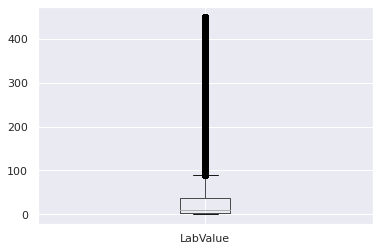

In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.boxplot();

In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1744609 entries, 0 to 1744608
Data columns (total 10 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   PatientID                    object 
 1   PrimaryDiagnosisCode         object 
 2   PrimaryDiagnosisDescription  object 
 3   PatientGender                object 
 4   PatientDateOfBirth           object 
 5   PatientRace                  object 
 6   PatientMaritalStatus         object 
 7   LabName                      object 
 8   LabValue                     float64
 9   LabUnits                     object 
dtypes: float64(1), object(9)
memory usage: 146.4+ MB


## 11) Generating new fields like PatientAge and PatientAgeCategory

In [ ]:
import datetime
from datetime import date as dt

In [ ]:
dt.today()

datetime.date(2020, 8, 18)

In [ ]:
type(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientDateOfBirth'])

pandas.core.series.Series

In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['DateToday'] = dt.today()

In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.head(2)

,PatientID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,LabName,LabValue,LabUnits,DateToday
0,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,H30.811,"Harada's disease, right eye",Male,1950-04-28 05:47:36.220,Unknown,Married,METABOLIC: ALT/SGPT,40.0,U/L,2020-08-18
1,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,H30.811,"Harada's disease, right eye",Male,1950-04-28 05:47:36.220,Unknown,Married,CBC: MONOCYTES,0.9,k/cumm,2020-08-18


In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientDateOfBirth'] = pd.to_datetime(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientDateOfBirth']).dt.date

In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientAge']=data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['DateToday']-data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientDateOfBirth']

In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.tail()

,PatientID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,LabName,LabValue,LabUnits,DateToday,PatientAge
1744604,3BB2DEBF-AFCC-4A3D-8DF4-32415D609435,C91.3,Prolymphocytic leukemia of B-cell type,Female,1958-12-03,White,Divorced,CBC: NEUTROPHILS,7.1,k/cumm,2020-08-18,22539 days
1744605,3BB2DEBF-AFCC-4A3D-8DF4-32415D609435,C91.3,Prolymphocytic leukemia of B-cell type,Female,1958-12-03,White,Divorced,METABOLIC: ALK PHOS,43.3,U/L,2020-08-18,22539 days
1744606,3BB2DEBF-AFCC-4A3D-8DF4-32415D609435,C91.3,Prolymphocytic leukemia of B-cell type,Female,1958-12-03,White,Divorced,CBC: MCH,33.8,pg,2020-08-18,22539 days
1744607,3BB2DEBF-AFCC-4A3D-8DF4-32415D609435,C91.3,Prolymphocytic leukemia of B-cell type,Female,1958-12-03,White,Divorced,URINALYSIS: SPECIFIC GRAVITY,1.0,no unit,2020-08-18,22539 days
1744608,3BB2DEBF-AFCC-4A3D-8DF4-32415D609435,C91.3,Prolymphocytic leukemia of B-cell type,Female,1958-12-03,White,Divorced,METABOLIC: POTASSIUM,3.8,mmol/L,2020-08-18,22539 days


In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientAge'] = data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientAge']/np.timedelta64(1,'Y')
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.head()

,PatientID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,LabName,LabValue,LabUnits,DateToday,PatientAge
0,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,H30.811,"Harada's disease, right eye",Male,1950-04-28,Unknown,Married,METABOLIC: ALT/SGPT,40.0,U/L,2020-08-18,70.309452
1,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,H30.811,"Harada's disease, right eye",Male,1950-04-28,Unknown,Married,CBC: MONOCYTES,0.9,k/cumm,2020-08-18,70.309452
2,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,H30.811,"Harada's disease, right eye",Male,1950-04-28,Unknown,Married,METABOLIC: GLUCOSE,134.2,mg/dL,2020-08-18,70.309452
3,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,H30.811,"Harada's disease, right eye",Male,1950-04-28,Unknown,Married,CBC: RDW,15.0,%,2020-08-18,70.309452
4,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,H30.811,"Harada's disease, right eye",Male,1950-04-28,Unknown,Married,METABOLIC: ALBUMIN,2.8,gm/dL,2020-08-18,70.309452


In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.loc[(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.PatientAge<18.0),'PatientAgeCategory']='Minor'
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.loc[(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.PatientAge>=18.0) &(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.PatientAge<=35.0),'PatientAgeCategory']='Youth'

data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.loc[(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.PatientAge>35.0) &(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.PatientAge<60.0),'PatientAgeCategory']='Adults'
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.loc[(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.PatientAge>=60.0),'PatientAgeCategory']='Senior Citizen'

In [ ]:
Counter(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.PatientAgeCategory)

Counter({'Adults': 464433, 'Senior Citizen': 1277721, 'Youth': 2455})

In [ ]:
Counter(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.PatientGender)

Counter({'Female': 814394, 'Male': 930215})

In [ ]:
Counter(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.PatientRace)

Counter({'African American': 120617,
         'Asian': 446858,
         'Unknown': 129092,
         'White': 1048042})

In [ ]:
Counter(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.PatientMaritalStatus)

Counter({'Divorced': 127333,
         'Married': 720369,
         'Separated': 169206,
         'Single': 494986,
         'Unknown': 224426,
         'Widowed': 8289})

In [ ]:
Counter(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.LabName)

Counter({'CBC: ABSOLUTE LYMPHOCYTES': 49898,
         'CBC: ABSOLUTE NEUTROPHILS': 48816,
         'CBC: BASOPHILS': 50262,
         'CBC: EOSINOPHILS': 50162,
         'CBC: HEMATOCRIT': 48867,
         'CBC: HEMOGLOBIN': 49103,
         'CBC: LYMPHOCYTES': 48458,
         'CBC: MCH': 50033,
         'CBC: MCHC': 50377,
         'CBC: MEAN CORPUSCULAR VOLUME': 49836,
         'CBC: MONOCYTES': 50410,
         'CBC: NEUTROPHILS': 50528,
         'CBC: PLATELET COUNT': 50025,
         'CBC: RDW': 50412,
         'CBC: RED BLOOD CELL COUNT': 50071,
         'CBC: WHITE BLOOD CELL COUNT': 50377,
         'METABOLIC: ALBUMIN': 50154,
         'METABOLIC: ALK PHOS': 49055,
         'METABOLIC: ALT/SGPT': 49210,
         'METABOLIC: ANION GAP': 50314,
         'METABOLIC: AST/SGOT': 49687,
         'METABOLIC: BILI TOTAL': 50140,
         'METABOLIC: BUN': 48382,
         'METABOLIC: CALCIUM': 49251,
         'METABOLIC: CARBON DIOXIDE': 50357,
         'METABOLIC: CHLORIDE': 49565,
        

In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1744609 entries, 0 to 1744608
Data columns (total 13 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   PatientID                    object 
 1   PrimaryDiagnosisCode         object 
 2   PrimaryDiagnosisDescription  object 
 3   PatientGender                object 
 4   PatientDateOfBirth           object 
 5   PatientRace                  object 
 6   PatientMaritalStatus         object 
 7   LabName                      object 
 8   LabValue                     float64
 9   LabUnits                     object 
 10  DateToday                    object 
 11  PatientAge                   float64
 12  PatientAgeCategory           object 
dtypes: float64(2), object(11)
memory usage: 186.3+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
a=['PatientGender','PatientMaritalStatus','PatientRace','PatientAgeCategory']
for i in a:
    data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge[[i]]=enc.fit_transform(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge[i])

In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1744609 entries, 0 to 1744608
Data columns (total 13 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   PatientID                    object 
 1   PrimaryDiagnosisCode         object 
 2   PrimaryDiagnosisDescription  object 
 3   PatientGender                int64  
 4   PatientDateOfBirth           object 
 5   PatientRace                  int64  
 6   PatientMaritalStatus         int64  
 7   LabName                      object 
 8   LabValue                     float64
 9   LabUnits                     object 
 10  DateToday                    object 
 11  PatientAge                   float64
 12  PatientAgeCategory           int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 186.3+ MB


## 12) Displaying the encoded values of different features

In [ ]:
Counter(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.PatientGender)

Counter({0: 814394, 1: 930215})

In [ ]:
Counter(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.PatientRace)

Counter({0: 120617, 1: 446858, 2: 129092, 3: 1048042})

In [ ]:
Counter(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.PatientMaritalStatus)

Counter({0: 127333, 1: 720369, 2: 169206, 3: 494986, 4: 224426, 5: 8289})

In [ ]:
Counter(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.PatientAgeCategory)

Counter({0: 464433, 1: 1277721, 2: 2455})

In [ ]:
corr=data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.corr()
corr

,PatientGender,PatientRace,PatientMaritalStatus,LabValue,PatientAge,PatientAgeCategory
PatientGender,1.000000,0.221400,-0.493493,-0.005601,-0.120604,0.005874
PatientRace,0.221400,1.000000,-0.113067,-0.004030,0.053000,0.051278
PatientMaritalStatus,-0.493493,-0.113067,1.000000,0.004681,0.199760,0.102053
LabValue,-0.005601,-0.004030,0.004681,1.000000,-0.000362,-0.001155
PatientAge,-0.120604,0.053000,0.199760,-0.000362,1.000000,0.681898
PatientAgeCategory,0.005874,0.051278,0.102053,-0.001155,0.681898,1.000000


## 13) Correlation Matrix

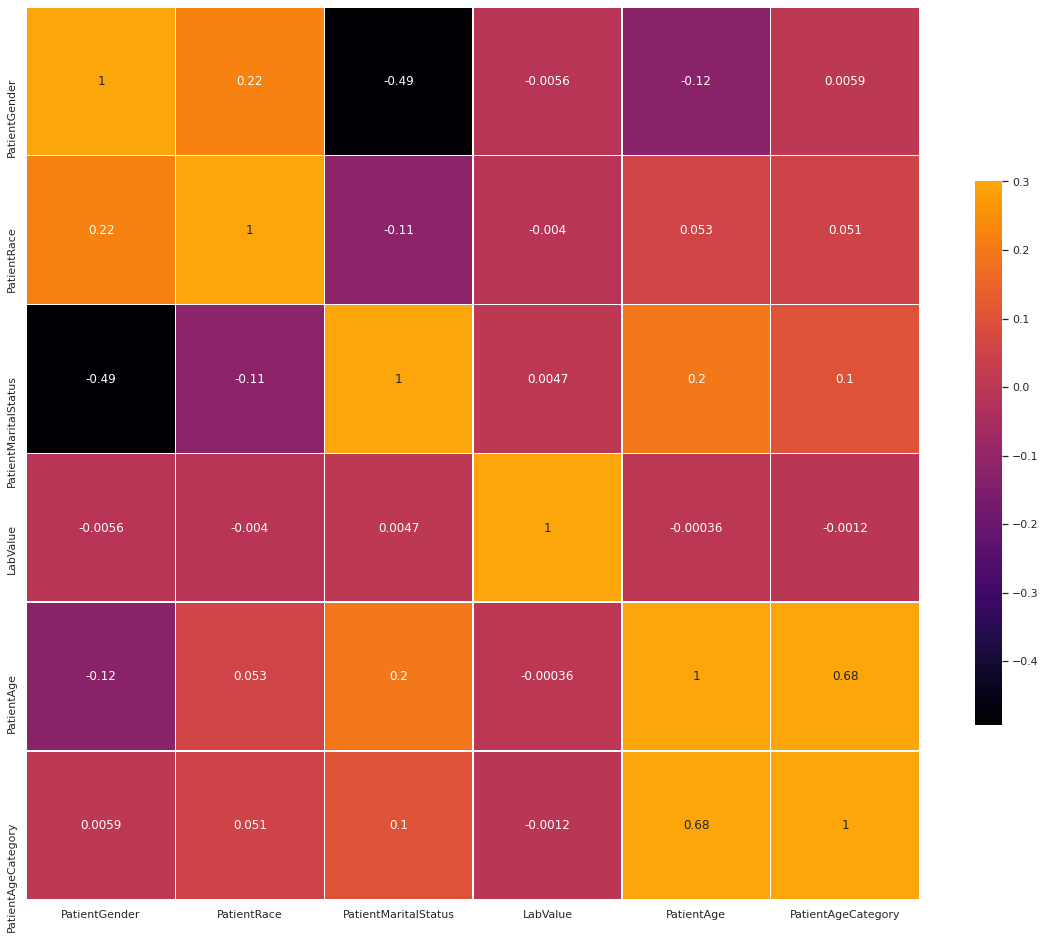

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap='inferno',vmax=.3,center=0,square=True,linewidths=.6,cbar_kws={'shrink':.5},annot=True)

## 14) Defining X and y variables

In [ ]:
X=data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.loc[:,['PatientGender','PatientRace','PatientMaritalStatus','PatientAgeCategory','LabValue']]
X.head()

,PatientGender,PatientRace,PatientMaritalStatus,PatientAgeCategory,LabValue
0,1,2,1,1,40.0
1,1,2,1,1,0.9
2,1,2,1,1,134.2
3,1,2,1,1,15.0
4,1,2,1,1,2.8


In [ ]:
y=data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.PrimaryDiagnosisCode
y.head()

0    H30.811
1    H30.811
2    H30.811
3    H30.811
4    H30.811
Name: PrimaryDiagnosisCode, dtype: object

## 15) Using train-test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=5,test_size=0.25)
print(" X train shape = ",X_train.shape)
print(" y train shape = ",y_train.shape)
print(" X test shape = ",X_test.shape)
print(" y test shape = ",y_test.shape)

 X train shape =  (1308456, 5)
 y train shape =  (1308456,)
 X test shape =  (436153, 5)
 y test shape =  (436153,)


## 16) Using different kinds of Machine Learning Classification type Algorithms

## 1) Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [ ]:
model=RandomForestClassifier(n_estimators=1,random_state=10)
model.fit(X_train,y_train)
print(" Model Feature Importances = " ,model.feature_importances_)
y_train_predict=model.predict(X_train)
y_test_predict=model.predict(X_test)
print(confusion_matrix(y_test,y_test_predict))
pd.crosstab(y_test,y_test_predict)
print("Accuracy of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing = ",accuracy_score(y_test,y_test_predict)*100)
print("Precision = ",precision_score(y_test,y_test_predict,average='weighted')*100)
print("Recall = ",recall_score(y_test,y_test_predict,average='weighted')*100)
print("F1 score = ", f1_score(y_test,y_test_predict,average='weighted')*100)

 Model Feature Importances =  [0.04001763 0.30746393 0.24256922 0.13594688 0.27400234]
[[335   0   0 ...   0   0   0]
 [  0 112   0 ...   0   0   0]
 [  0   0 289 ...   0   0   0]
 ...
 [  0   0   0 ...  56   0   0]
 [  0   0   0 ...   0 147   0]
 [  0   0   0 ...   0   0  15]]
Accuracy of Training =  15.97027336035755
Accuracy of Testing =  11.389351901740904
Precision =  11.63907483658968
Recall =  11.389351901740904
F1 score =  10.947037231052136


## 2) Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt=DecisionTreeClassifier(criterion='gini',splitter='best',random_state=10,max_depth=4)
model_dt.fit(X_train,y_train)
print(" Model Feature Importances = " ,model_dt.feature_importances_)
y_train_predict=model_dt.predict(X_train)
y_test_predict=model_dt.predict(X_test)
print(confusion_matrix(y_test,y_test_predict))
pd.crosstab(y_test,y_test_predict)
print("Accuracy of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing = ",accuracy_score(y_test,y_test_predict)*100)
print("Precision = ",precision_score(y_test,y_test_predict,average='weighted')*100)
print("Recall = ",recall_score(y_test,y_test_predict,average='weighted')*100)
print("F1 score = ", f1_score(y_test,y_test_predict,average='weighted')*100)

 Model Feature Importances =  [7.76832785e-02 3.40766416e-01 4.05765427e-01 1.75758085e-01
 2.67930897e-05]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy of Training =  6.94062314667058
Accuracy of Testing =  6.729519228344182
Precision =  1.0364319194012837
Recall =  6.729519228344182
F1 score =  1.5854457038362464


## 3) Extra Trees Classifier

In [ ]:
from sklearn.ensemble.forest import ExtraTreesClassifier

In [ ]:
model_et=ExtraTreesClassifier(n_estimators=2,criterion='gini',random_state=10,max_depth=4,bootstrap=True)
model_et.fit(X_train,y_train)
print(" Model Feature Importances = " ,model_et.feature_importances_)
y_train_predict=model_et.predict(X_train)
y_test_predict=model_et.predict(X_test)
print(confusion_matrix(y_test,y_test_predict))
pd.crosstab(y_test,y_test_predict)
print("Accuracy of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing = ",accuracy_score(y_test,y_test_predict)*100)
print("Precision = ",precision_score(y_test,y_test_predict,average='weighted')*100)
print("Recall = ",recall_score(y_test,y_test_predict,average='weighted')*100)
print("F1 score = ", f1_score(y_test,y_test_predict,average='weighted')*100)

 Model Feature Importances =  [1.09092735e-01 2.59205407e-01 4.81788503e-01 1.49902005e-01
 1.13499167e-05]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy of Training =  10.162817855548829
Accuracy of Testing =  9.92954307318762
Precision =  1.600354351287999
Recall =  9.92954307318762
F1 score =  2.598210936786531


## 4)Extra Tree Classifier

In [ ]:
from sklearn.tree import ExtraTreeClassifier

In [ ]:
model_et1=ExtraTreeClassifier(criterion='gini',random_state=10,max_depth=4)
model_et1.fit(X_train,y_train)
print(" Model Feature Importances = " ,model_et1.feature_importances_)
y_train_predict=model_et.predict(X_train)
y_test_predict=model_et.predict(X_test)
print(confusion_matrix(y_test,y_test_predict))
pd.crosstab(y_test,y_test_predict)
print("Accuracy of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing = ",accuracy_score(y_test,y_test_predict)*100)
print("Precision = ",precision_score(y_test,y_test_predict,average='weighted')*100)
print("Recall = ",recall_score(y_test,y_test_predict,average='weighted')*100)
print("F1 score = ", f1_score(y_test,y_test_predict,average='weighted')*100)

 Model Feature Importances =  [1.52169487e-01 3.67323628e-01 3.47288815e-01 1.33130613e-01
 8.74560248e-05]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy of Training =  10.162817855548829
Accuracy of Testing =  9.92954307318762
Precision =  1.600354351287999
Recall =  9.92954307318762
F1 score =  2.598210936786531


## 17)Saving the final data into the local system

In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.to_csv("/content/drive/My Drive/Colab Notebooks/Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge_Binary.csv")

## 18) Exporting the model on joblib

In [ ]:
pip install joblib

In [ ]:
import joblib
joblib.dump(model,'EHR_Trained_Model.ml')

['EHR_Trained_Model.ml']

In [ ]:
model=joblib.load('EHR_Trained_Model.ml')

In [ ]:
model.predict([[0,0,1,0,20]])

array(['H75.03'], dtype=object)